In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [18]:
game_stats = pd.read_csv('../csv/game_stats.csv')
game_stats["totalGoals"] = game_stats["home_goals"] + game_stats["away_goals"]
game_stats = game_stats[game_stats["totalGoals"] < 10]  # remove outliers 99% of games will be kept
del game_stats["Unnamed: 0"]
del game_stats["home_goals"]
del game_stats["away_goals"]
del game_stats["home_powerPlayGoals"]
del game_stats["away_powerPlayGoals"]
del game_stats["home_powerPlayOpportunities"]
del game_stats["away_powerPlayOpportunities"]

game_stats = game_stats.drop_duplicates()
game_stats = game_stats.dropna()

game_stats

,home_pim,home_shots,home_powerPlayPercentage,home_faceOffWinPercentage,home_blocked,home_takeaways,home_giveaways,home_hits,away_pim,away_shots,away_powerPlayPercentage,away_faceOffWinPercentage,away_blocked,away_takeaways,away_giveaways,away_hits,totalGoals
2,10,29,0.0,68.2,17,5,2,23,12,15,33.3,31.8,8,6,4,23,6
5,10,27,0.0,51.6,13,8,16,45,4,40,40.0,48.4,4,3,9,22,4
9,4,41,50.0,41.4,18,4,10,24,4,15,50.0,58.6,11,4,9,13,7
10,2,46,50.0,45.6,9,8,12,29,6,39,0.0,54.4,13,6,6,20,7
11,2,24,66.7,57.1,7,3,19,23,6,34,0.0,42.9,15,9,9,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21383,4,32,0.0,52.6,15,5,9,29,8,19,0.0,47.4,23,6,7,33,4
21384,4,23,0.0,43.9,23,14,19,20,6,24,50.0,56.1,17,8,7,13,3
21386,9,32,0.0,63.6,13,4,12,27,9,37,0.0,36.4,17,7,10,27,7
21390,4,37,75.0,49.0,6,3,11,9,8,21,0.0,51.0,10,3,2,17,5


In [19]:
col_names = [col for col in game_stats.columns]


originalGoals = game_stats["totalGoals"]

# z = (x-mean)/std
# x = (z*std)+mean

original_mean = game_stats.mean()
original_std = game_stats.std()

game_stats_normalized =(game_stats-original_mean)/original_std
game_stats = game_stats_normalized
game_stats["totalGoals"] = originalGoals

features = np.array(game_stats.loc[:, game_stats.columns != 'totalGoals'],  dtype='float32')
# augment bias term to features
features = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
targets = np.array(game_stats['totalGoals'], dtype='int32')


x_train = features[:int(features.shape[0] * 0.8)]
t_train = targets[:int(targets.shape[0] * 0.8)]

x_val = features[int(features.shape[0] * 0.8): int(features.shape[0] * 0.9)]
t_val = targets[int(targets.shape[0] * 0.8): int(targets.shape[0] * 0.9)]

x_test = features[int(features.shape[0] * 0.9):]
t_test = targets[int(targets.shape[0] * 0.9):]


In [25]:
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', penalty='l2', C=0.7, max_iter=2000)
model.fit(x_train, t_train)

LogisticRegression(C=0.7, max_iter=2000, multi_class='multinomial')

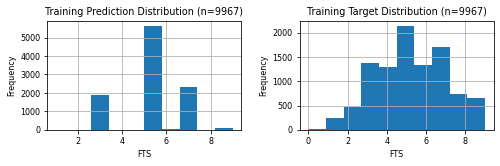

In [34]:
plt.rcParams["figure.figsize"] = (8, 2)
plt.rcParams["font.size"] = 8
preds = model.predict(x_train)

pred_and_targets_df = pd.DataFrame({f'Training Prediction Distribution (n={len(preds)})': preds, f'Training Target Distribution (n={len(preds)})': t_train})
s = pred_and_targets_df.hist()
for ax in s.flatten():
    ax.set_xlabel("FTS")
    ax.set_ylabel("Frequency")

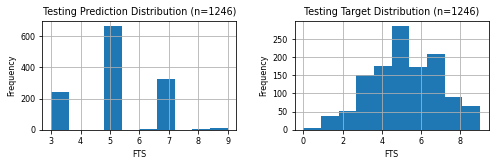

In [36]:
preds = model.predict(x_test)

pred_and_targets_df = pd.DataFrame({f'Testing Prediction Distribution (n={len(preds)})': preds, f'Testing Target Distribution (n={len(preds)})': t_test})
s = pred_and_targets_df.hist()
for ax in s.flatten():
    ax.set_xlabel("FTS")
    ax.set_ylabel("Frequency")

In [39]:
mse = np.mean((preds - t_test) ** 2)
mse

3.865168539325843

In [40]:
acc = np.mean(preds == t_test)
acc

0.22873194221508827